In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class',axis=1)

In [5]:
X  = pd.get_dummies(data=X,drop_first=True)

In [7]:
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
model = GradientBoostingClassifier()

In [13]:
param_grid = {'n_estimators':[10,20,50,70,100,120],'learning_rate':[0.001,0.01,0.1,0.2],'max_depth':[2,3,4,5]}

In [14]:
grid_model = GridSearchCV(model,param_grid)

In [15]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 70, 100, 120]})

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
y_pred =  grid_model.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [19]:
grid_model.best_estimator_.feature_importances_

array([2.93892567e-04, 1.28011615e-16, 0.00000000e+00, 0.00000000e+00,
       1.06268305e-16, 2.00087692e-03, 4.67160608e-16, 2.38515769e-16,
       0.00000000e+00, 0.00000000e+00, 1.88336378e-16, 4.03101213e-16,
       6.97300885e-17, 0.00000000e+00, 0.00000000e+00, 2.14595525e-16,
       5.32018765e-16, 6.77567181e-02, 0.00000000e+00, 1.48556410e-02,
       4.68567486e-03, 5.06161721e-04, 6.25147779e-01, 1.80795587e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.11200786e-03,
       1.84124665e-03, 0.00000000e+00, 6.48189568e-17, 0.00000000e+00,
       0.00000000e+00, 2.22443861e-16, 0.00000000e+00, 1.24836083e-15,
       4.28002874e-17, 0.00000000e+00, 9.20885882e-17, 0.00000000e+00,
       0.00000000e+00, 1.05149893e-03, 1.11254711e-01, 1.98468244e-02,
       2.87878005e-02, 2.47597556e-04, 4.30293808e-04, 0.00000000e+00,
       0.00000000e+00, 1.23323686e-03, 3.94775389e-02, 6.10512964e-04,
       0.00000000e+00, 0.00000000e+00, 9.12030375e-04, 0.00000000e+00,
      

In [20]:
feat_imp = grid_model.best_estimator_.feature_importances_

In [23]:
imp_feat = pd.DataFrame(data=feat_imp,
                        index=X.columns,
                        columns=['Importances'])

In [25]:
imp_feat = imp_feat[imp_feat['Importances']>0.005]

In [26]:
imp_feat

,Importances
bruises_t,0.067757
odor_f,0.014856
odor_n,0.625148
odor_p,0.018080
stalk-root_c,0.111255
stalk-root_e,0.019847
stalk-root_r,0.028788
stalk-surface-below-ring_y,0.039478
spore-print-color_h,0.010770
spore-print-color_r,0.031475


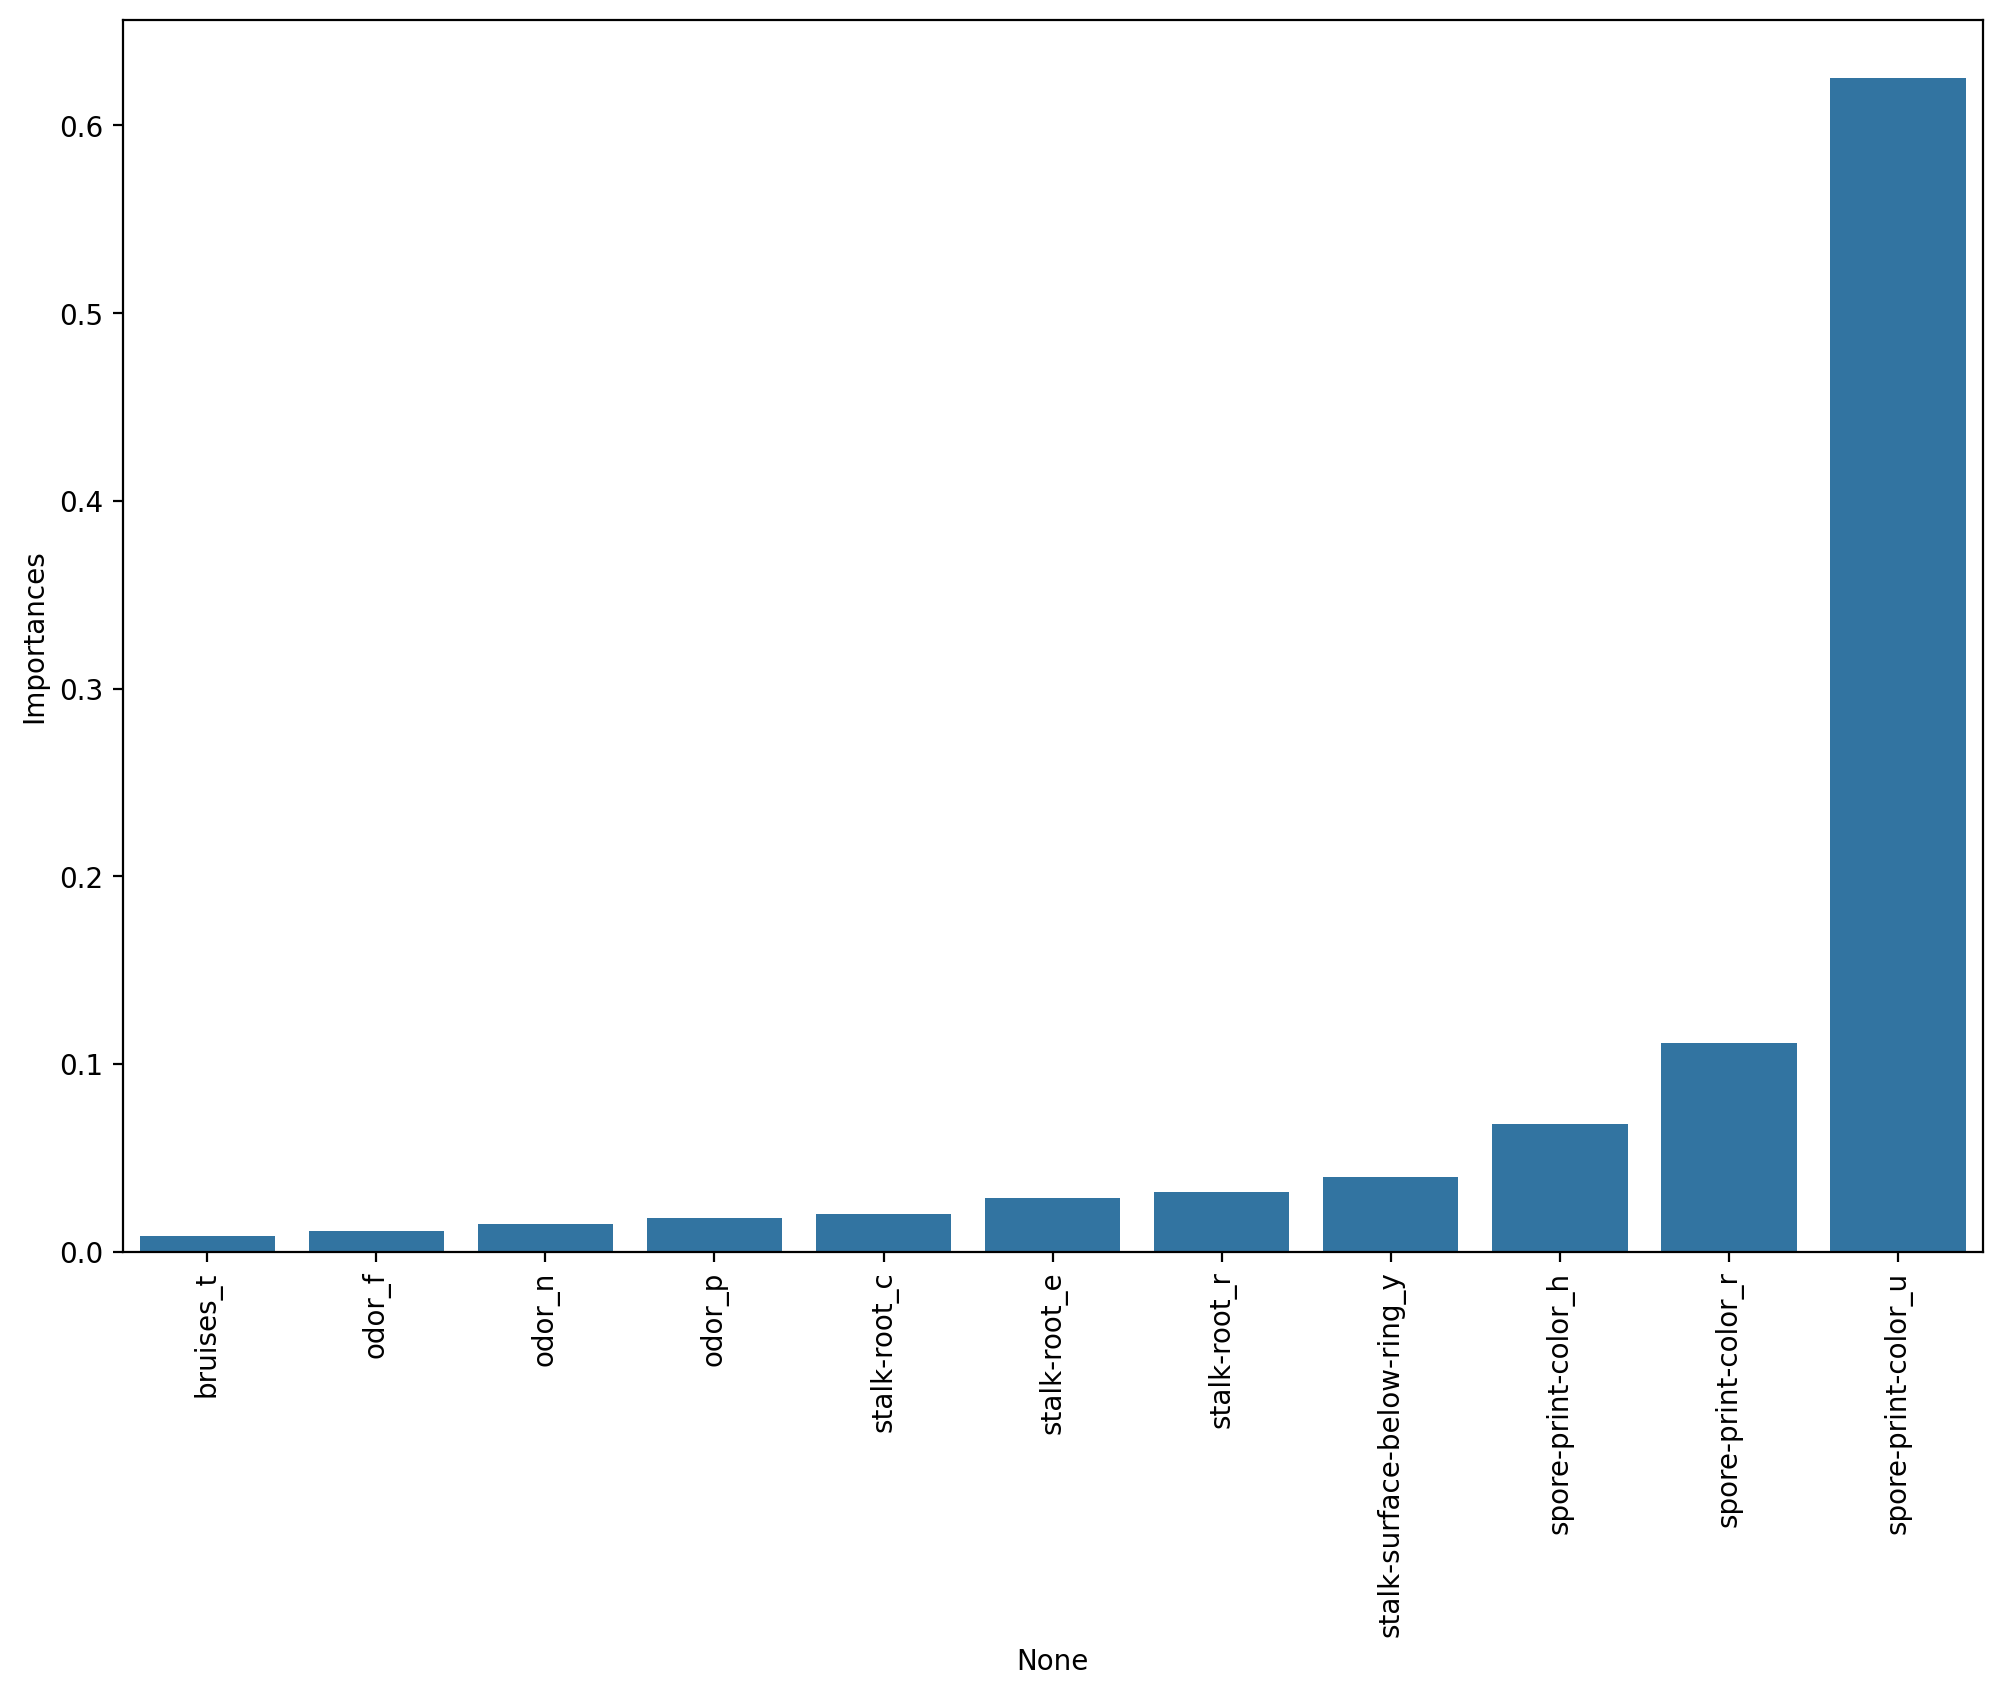

In [32]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat.sort_values('Importances'),x=imp_feat.index,y='Importances')
plt.xticks(rotation=90);